# Visualizing Decision Tree Classifiers

+ Viewing classification regions in (2D) feature space
+ Viewing decision trees with `graphviz`

## Decision Trees for Classification

- Mapping features $\mathbf{X}$ $\mapsto$ targets $\mathbf{y}$ often nonlinear
  - Continuous targets: linear regression insufficient
  - Categorical targets: decision boundaries complicated
- No assumptions about underlying distribution of data
- Trees readily intelligible by non-specialists
- Splitting decisions as tool for feature selection tool

## Classification trees in Scikit-Learn

Simplest invokation:

```python
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier() # Instantiate
tree_clf.fit(X,y)                   # Fit to data
```

```python
# Apply classifier to new (unseen) data
y_new = clf.predict(X_new)
```

```python
DecisionTreeClassifier(
        class_weight=None, criterion='gini',
        max_depth=None, max_features=None,
        max_leaf_nodes=None, min_impurity_decrease=0.,
        min_impurity_split=None, min_samples_leaf=1,
        min_samples_split=2,
        min_weight_fraction_leaf=0.0, presort=False,
        random_state=None, splitter='best')
```

+ 13 default options tune algorithm behavior
+ `criterion`: `'gini'` or `'entropy'`
+ `splitter`: `'best'` or `'random'`

## How Decision Tree classifiers work

+ Iteratively splits dataset at each node
+ Splitting from quantitative criterion on some coordinate/feature
+ Each level assigned label by majority vote
+ Criterion for splitting: information gain (entropy) or Gini impurity

In [2]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Required imports for function visualize_tree_graphviz
import io
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, display 

## Viewing classification regions in (2D) feature space

<img align="left" style="padding-right:10px;" src="./images/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

In [4]:
def visualize_classifier_2d(model, X, y, ax=None, **kwargs):
    '''Utility function (modified from Jake Vanderplas)
    Visualizes decision-tree classifier in two dimensions.
    Input :
    model : (trained) Estimator object from sklearn
    X : n by 2 matrix of features (observations)
    y : vector of length n of labels (targets)
    ax : matplotlib axis in which to plot
    cmap : colormap to use
    '''
    # Set up 2D scatterplot from data
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30,
               clim=(y.min(), y.max()), zorder=3, **kwargs)
    ax.axis('tight'); ax.axis('off')
    # Set up fine grid of samples for 2D background
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Create a color contour plot with results
    lvls = np.arange(len(np.unique(y)) + 1) - 0.5
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=lvls,
                           vmin=y.min(), vmax=y.max(),
                           zorder=1, **kwargs)

```python
def visualize_classifier_2d(model, X, y, ax=None, **kwargs):
    '''Utility function (modified from Jake Vanderplas)
    Visualizes decision-tree classifier in two dimensions.
    Input :
    model : (trained) Estimator object from sklearn
    X : n by 2 matrix of features (observations)
    y : vector of length n of labels (targets)
    ax : matplotlib axis in which to plot
    '''```

```python
    # Set up 2D scatterplot from data
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30,
               clim=(y.min(), y.max()), zorder=3, **kwargs)
    ax.axis('tight'); ax.axis('off')```

```python
    # Set up fine grid of samples for 2D background
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)```

```python
    # Create a color contour plot with results
    lvls = np.arange(len(np.unique(y)) + 1) - 0.5
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=lvls,
                           vmin=y.min(), vmax=y.max(),
                           zorder=1, **kwargs)
    return None```

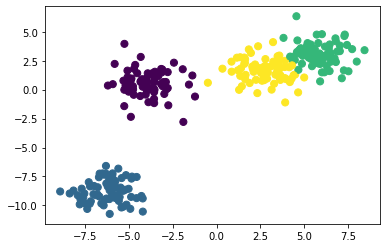

In [5]:
from sklearn.datasets import make_blobs
# Generate & visualize toy 2D classification problem
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=17, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

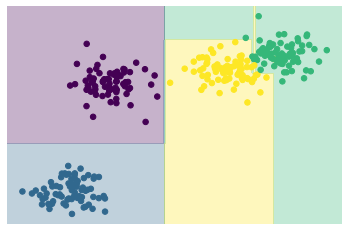

In [6]:
tree_clf = DecisionTreeClassifier()      # Instantiate model (defaults)
tree_clf.fit(X, y)                       # Fit to all data
visualize_classifier_2d(tree_clf, X, y)  # Plot with all data

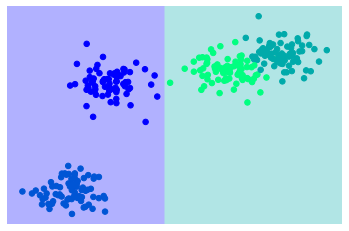

In [7]:
# Restrict depth of tree to 1
tree_clf1 = DecisionTreeClassifier(max_depth=1)
# Fit all data & plot (different colormap)
tree_clf1.fit(X, y)
visualize_classifier_2d(tree_clf1, X, y, cmap='winter')


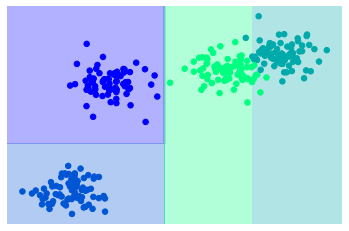

In [8]:
# Restrict depth of tree to 2
tree_clf2 = DecisionTreeClassifier(max_depth=2)
# Fit all data & plot
tree_clf2.fit(X, y)
visualize_classifier_2d(tree_clf2, X, y, cmap='winter')

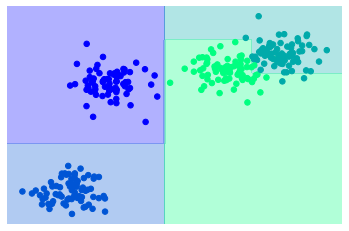

In [9]:
# Restrict depth of tree to 3
tree_clf3 = DecisionTreeClassifier(max_depth=3)
# Fit all data & plot
tree_clf3.fit(X, y)
visualize_classifier_2d(tree_clf3, X, y, cmap='winter')

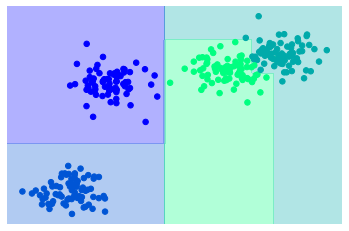

In [10]:
# Restrict depth of tree to 4
tree_clf4 = DecisionTreeClassifier(max_depth=4)
# Fit all data & plot
tree_clf4.fit(X, y)
visualize_classifier_2d(tree_clf4, X, y, cmap='winter')

## Visualizing a decision tree with `graphviz`

```bash
conda install graphviz
# ...or pip install graphviz
conda install pydotplus
# ...or pip install pydotplus
```

+ [Graphviz](https://graphviz.org/): open-source graph visualization software
+ This approach generalizes beyond 2D features

In [11]:
def visualize_tree_graphviz(model, **kwargs):
    '''Utility function to visualize a decision tree model
    Input :
    model : (trained) Estimator object from sklearn
    feature_names
    Output :
    image: IPython.display.Image object (png)
    '''
    f = io.StringIO()      # pre-empts output to a file
    export_graphviz(model, out_file=f,  
                    filled=True, rounded=True,
                    special_characters=True, **kwargs)
    graph = pydotplus.graph_from_dot_data(f.getvalue())
    image = Image(graph.create_png())
    return image

```python
def visualize_tree_graphviz(model, **kwargs):
    '''Utility function to visualize a decision tree model
    Input :
    model : (trained) Estimator object from sklearn
    Output :
    image: IPython.display.Image object (png)
    '''```

```python
    f = io.StringIO()      # pre-empts output to a file
    export_graphviz(model, out_file=f,  
                    filled=True, rounded=True,
                    special_characters=True, **kwargs)
    graph = pydotplus.graph_from_dot_data(f.getvalue())
    image = Image(graph.create_png())
    return image```

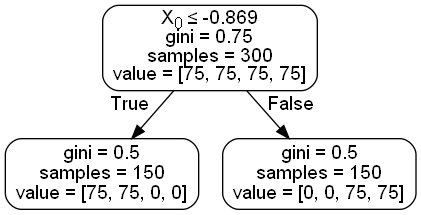

In [12]:
visualize_tree_graphviz(tree_clf1)

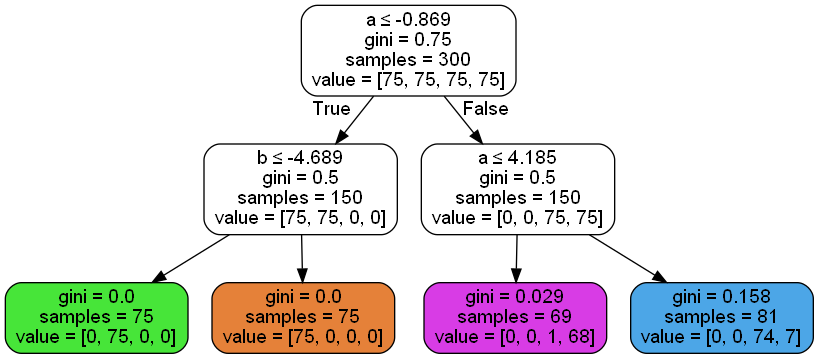

In [13]:
visualize_tree_graphviz(tree_clf2, feature_names=list('ab'))

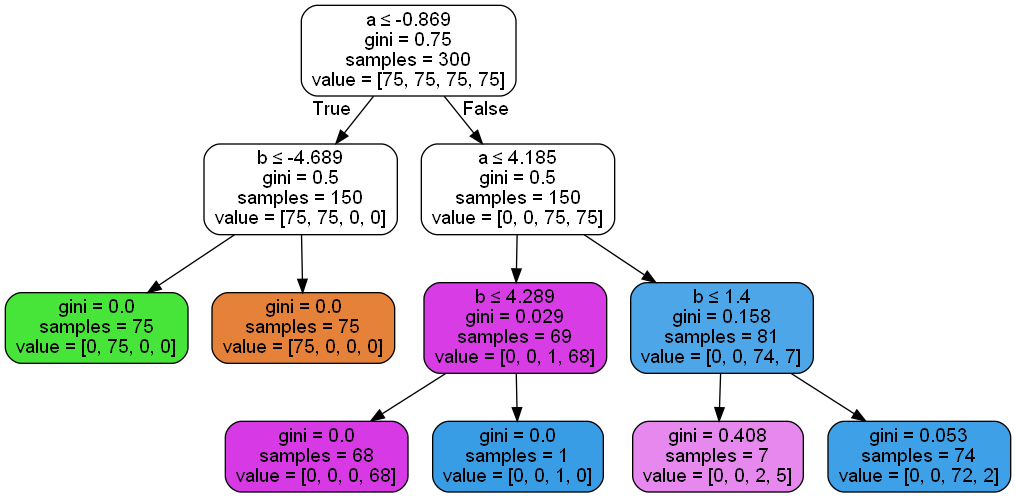

In [14]:
visualize_tree_graphviz(tree_clf3, feature_names=list('ab'))

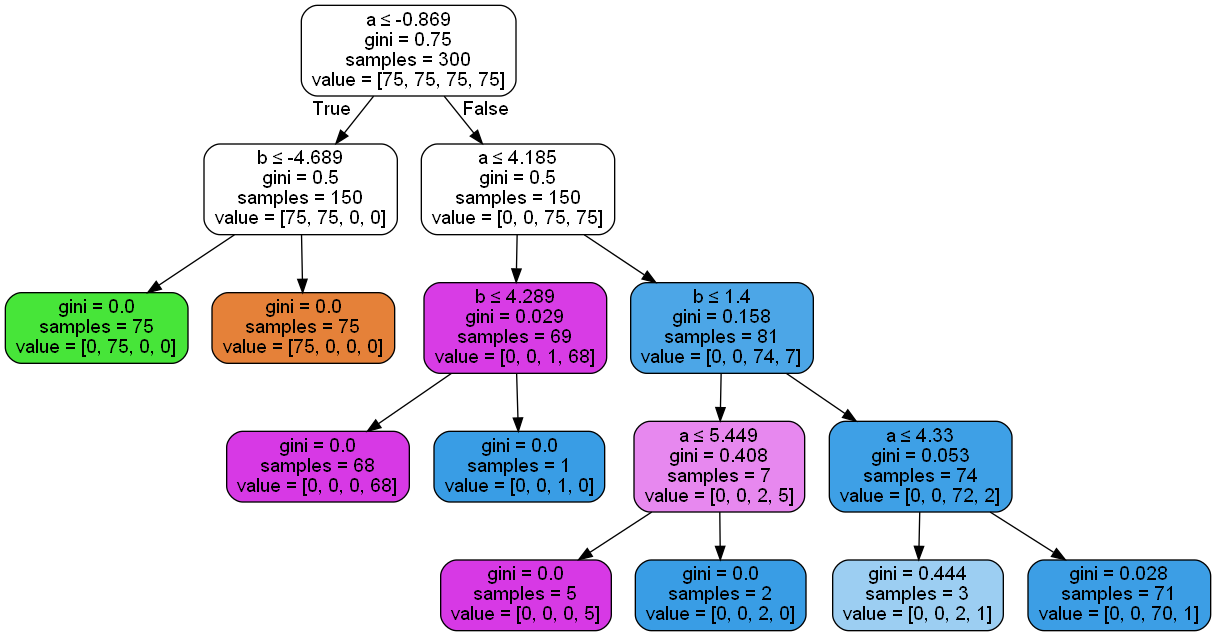

In [15]:
visualize_tree_graphviz(tree_clf4, feature_names=list('ab'))

# College Admissions Example

+ CSV file of admissions data
+ Features: `gre`, `gpa`, `prestige`
+ Target: `admit` (0 or 1 according to admission)


In [22]:
# Load admissions data
df = pd.read_csv('datasets/admissions.csv')
# Drop the nulls instead of imputing (for convenience)
df.dropna(inplace=True)
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [23]:
X_admit = df[['gpa', 'gre', 'prestige']]   # Choose columns for features
y_admit = np.where(df.admit==0, -1, 1)     # Change target values to {-1,1} vs. {0,1}
print(y_admit[:5])
X_admit.head()

[-1  1  1  1 -1]


,gpa,gre,prestige
0,3.61,380.0,3.0
1,3.67,660.0,3.0
2,4.00,800.0,1.0
3,3.19,640.0,4.0
4,2.93,520.0,4.0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X_admit, y_admit, test_size=0.25, random_state=0)

print('X_train.shape: {}\t y_train.shape: {}'
        .format(X_train.shape, y_train.shape))
print('X_test.shape:  {}\t y_test.shape:  {}'
        .format(X_test.shape, y_test.shape))

X_train.shape: (297, 3)	 y_train.shape: (297,)
X_test.shape:  (100, 3)	 y_test.shape:  (100,)


In [25]:
# dict comprehension for fitting models
depths = [1, 2, 3, None]
trees = {depth : 
  DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
  for depth in depths}

In [26]:
# dict comprehension to capture visualizations
results = {depth:
            visualize_tree_graphviz(trees[depth],
                    feature_names=X_admit.columns)
            for depth in depths}

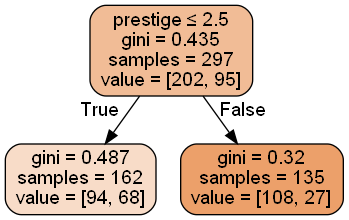

In [27]:
depth = 1; display(results[depth])

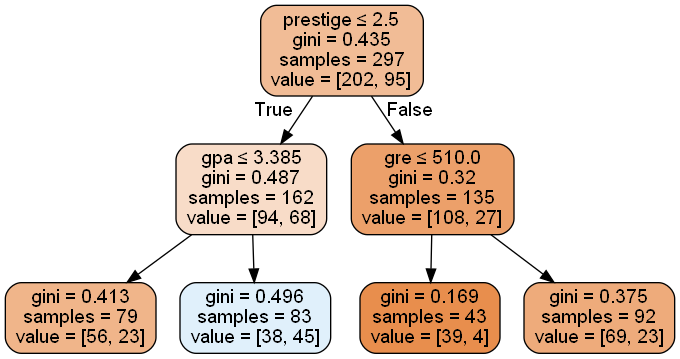

In [28]:
depth = 2; display(results[depth])

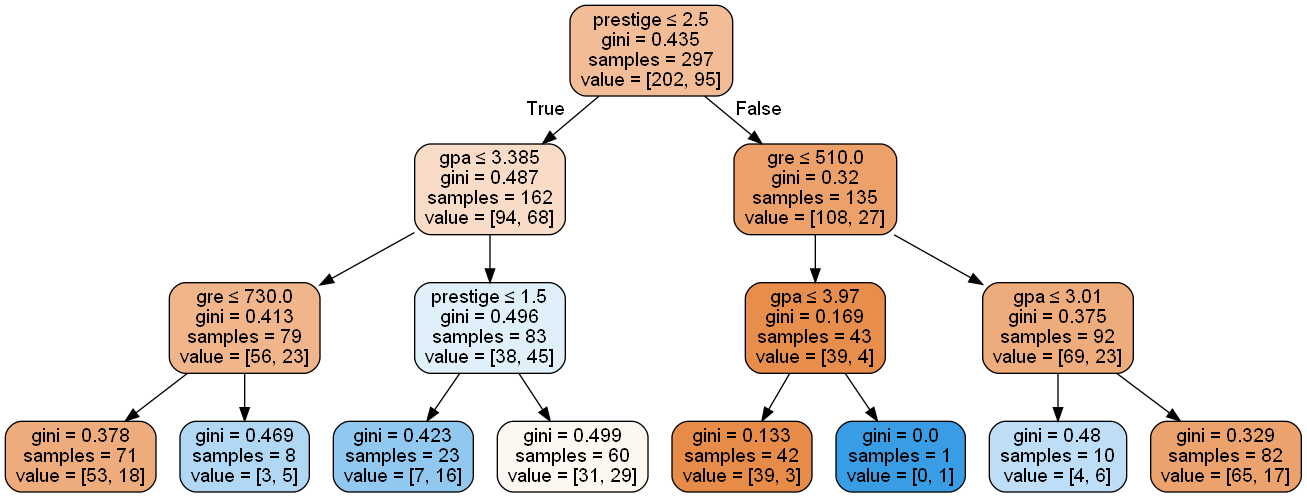

In [29]:
depth = 3; display(results[depth])

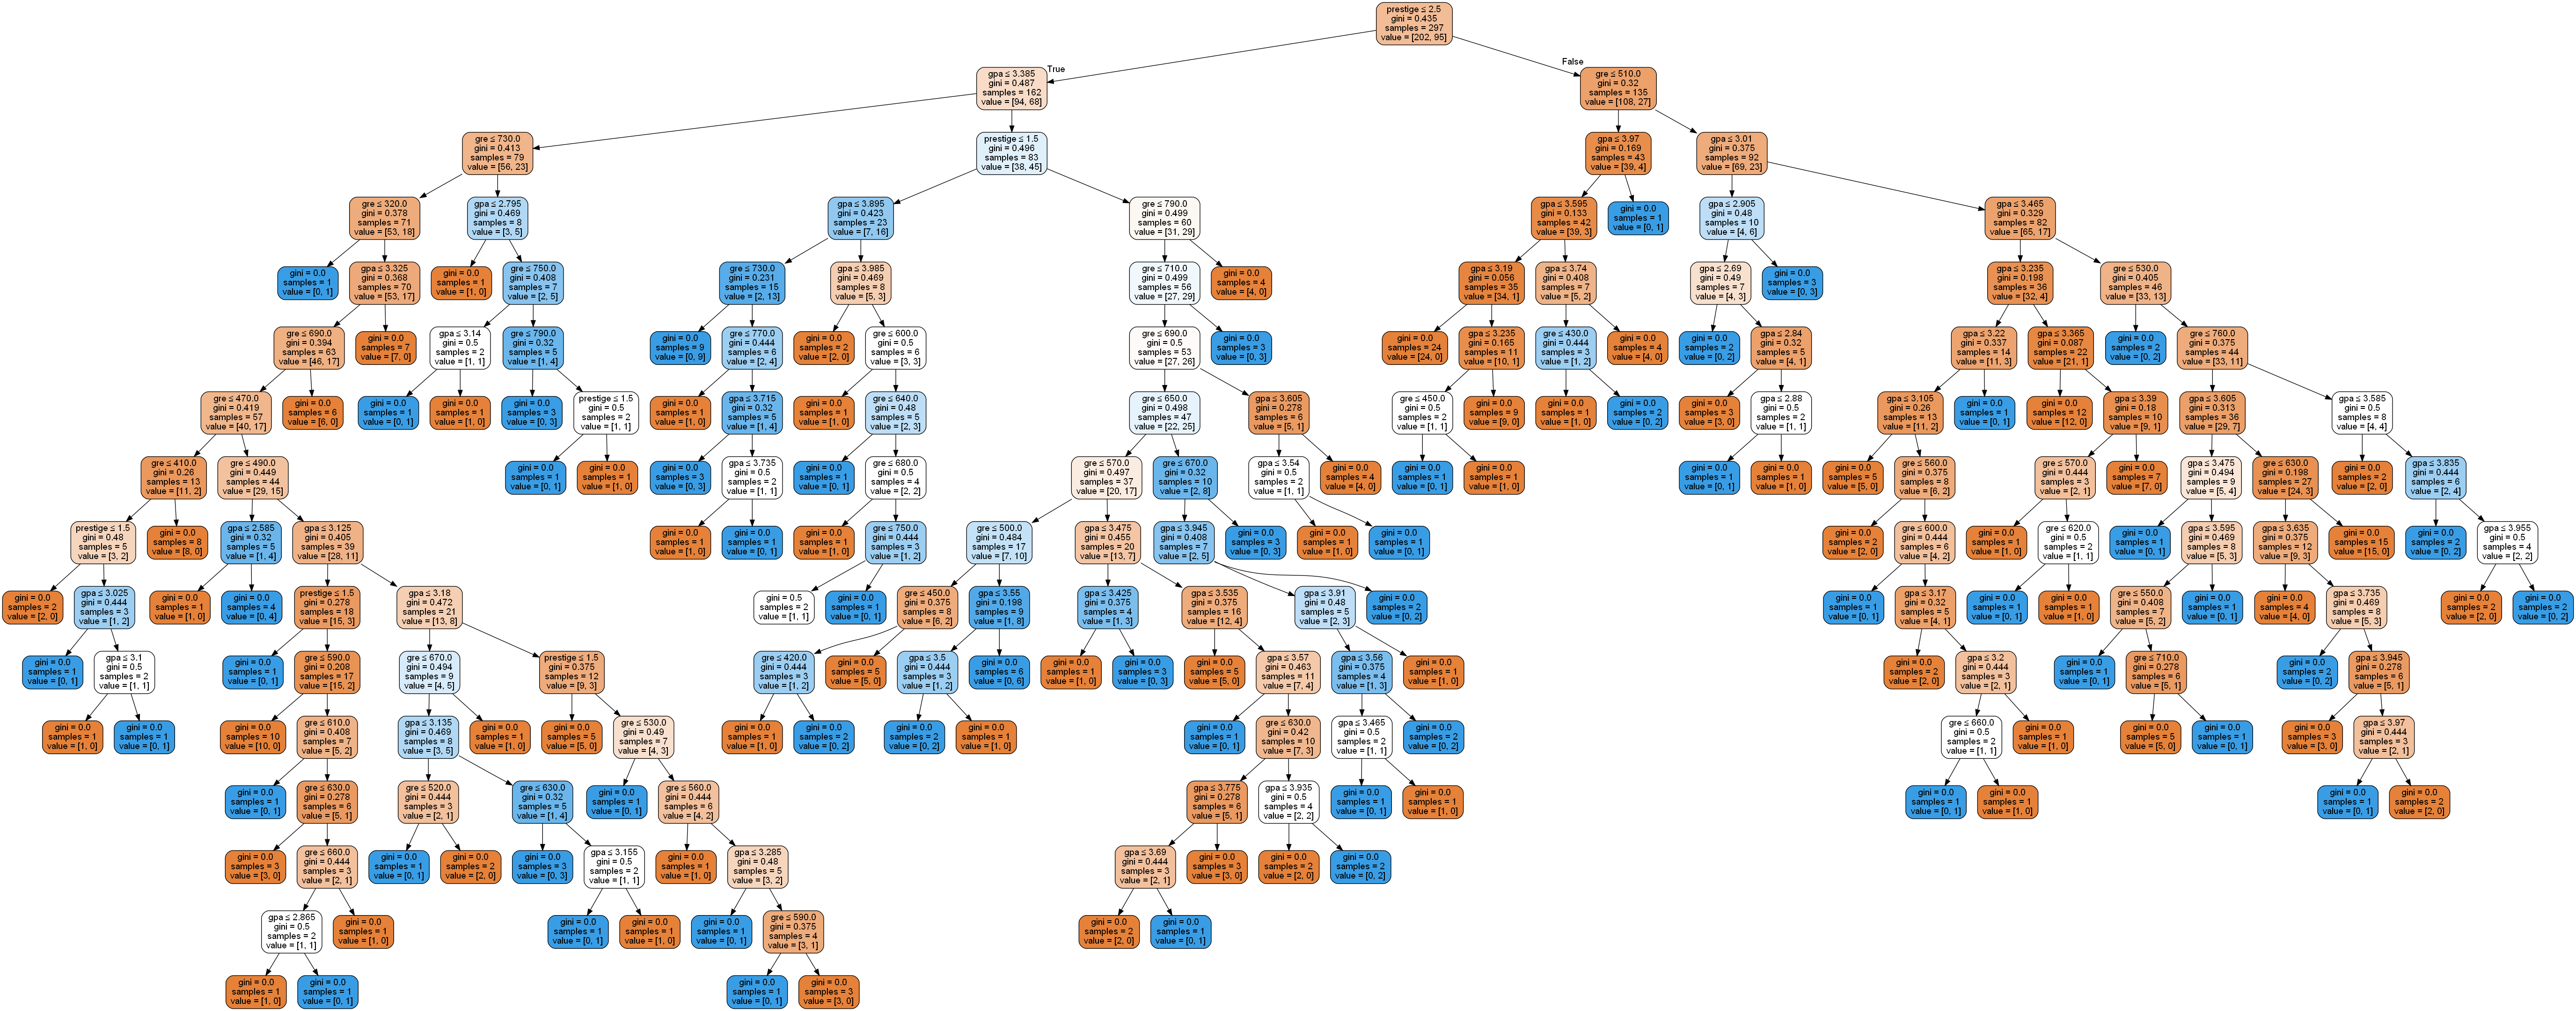

In [30]:
depth = None; display(results[depth])

In [31]:
# Import package for classification report:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [32]:
depth = 1
scores = cross_val_score(trees[depth], X_test, y_test, cv=4)
y_pred = trees[depth].predict(X_test)
print('Depth: {}\tAccuracy: mean {:6.2f}, std {:6.3f}\n'
          .format(depth, np.mean(scores), np.std(scores)) )
print(classification_report(y_test, y_pred,
                            target_names=['reject', 'accept']))

Depth: 1	Accuracy: mean   0.73, std  0.052

              precision    recall  f1-score   support

      reject       0.69      1.00      0.82        69
      accept       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



C:\Users\rjsch\anaconda3\envs\pgdads\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjsch\anaconda3\envs\pgdads\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rjsch\anaconda3\envs\pgdads\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
depth = 2
scores = cross_val_score(trees[depth], X_test, y_test, cv=4)
y_pred = trees[depth].predict(X_test)
print('Depth: {}\tAccuracy: mean {:6.2f}, std {:6.3f}\n'
          .format(depth, np.mean(scores), np.std(scores)) )
print(classification_report(y_test, y_pred,
                            target_names=['reject', 'accept']))

Depth: 2	Accuracy: mean   0.73, std  0.052

              precision    recall  f1-score   support

      reject       0.73      0.81      0.77        69
      accept       0.43      0.32      0.37        31

    accuracy                           0.66       100
   macro avg       0.58      0.57      0.57       100
weighted avg       0.64      0.66      0.64       100



In [34]:
depth = 3
scores = cross_val_score(trees[depth], X_test, y_test, cv=4)
y_pred = trees[depth].predict(X_test)
print('Depth: {}\tAccuracy: mean {:6.2f}, std {:6.3f}\n'
          .format(depth, np.mean(scores), np.std(scores)) )
print(classification_report(y_test, y_pred,
                            target_names=['reject', 'accept']))

Depth: 3	Accuracy: mean   0.72, std  0.049

              precision    recall  f1-score   support

      reject       0.75      0.90      0.82        69
      accept       0.59      0.32      0.42        31

    accuracy                           0.72       100
   macro avg       0.67      0.61      0.62       100
weighted avg       0.70      0.72      0.69       100



In [35]:
depth = None
scores = cross_val_score(trees[depth], X_test, y_test, cv=4)
y_pred = trees[depth].predict(X_test)
print('Depth: {}\tAccuracy: mean {:6.2f}, std {:6.3f}\n'
          .format(depth, np.mean(scores), np.std(scores)) )
print(classification_report(y_test, y_pred,
                            target_names=['reject', 'accept']))

Depth: None	Accuracy: mean   0.66, std  0.020

              precision    recall  f1-score   support

      reject       0.75      0.75      0.75        69
      accept       0.45      0.45      0.45        31

    accuracy                           0.66       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.66      0.66      0.66       100

